In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmers-penguin-dataset-extended/palmerpenguins_original.csv
/kaggle/input/palmers-penguin-dataset-extended/palmerpenguins_extended.csv


**Overview**

The original Palmer's Penguins dataset is an invaluable resource in the world of data science, often used for statistical analysis, data visualization, and introductory machine learning tasks. Collected in the Palmer Archipelago near Antarctica, the dataset provides information on three species of penguins, including Adélie, Gentoo, and Chinstrap, and covers essential biological metrics such as bill dimensions and body mass.

**K-Means Model**

Building a k-means model for the Palmer's Penguins dataset offers several valuable insights and practical applications in the realm of data analysis and machine learning. Firstly, k-means clustering can help uncover underlying patterns and structures within the data by partitioning the penguin samples into distinct clusters based on their features such as bill dimensions and body mass. This can aid researchers and scientists in understanding the natural variation and distribution of these penguin species in their habitats. Moreover, k-means clustering can assist in species classification and identification by grouping similar penguin specimens together. This capability is particularly useful for ecologists and conservationists who need to accurately classify and monitor penguin populations for research or conservation efforts. Additionally, the insights gained from k-means clustering can facilitate further analysis, such as investigating the ecological factors influencing the distribution of penguin species or studying the impact of environmental changes on their populations. Overall, building a k-means model for the Palmer's Penguins dataset not only helps in understanding the biology and behavior of these fascinating creatures but also contributes to broader scientific research and conservation efforts in polar ecosystems.

**Analysis**

With the Palmer Penguin dataset, I'll be analyzing the dataset to confirm if penguins of the same species exhibit different physical characteristics based on sex.

In [2]:
# Import necessary libraries and packages
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load in the Palmer Penguin dataset
penguins= pd.read_csv('/kaggle/input/palmers-penguin-dataset-extended/palmerpenguins_extended.csv')

In [4]:
# View the data
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


In [5]:
# Penguin species
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
# Count of each species type
penguins['species'].value_counts(dropna= False)

species
Adelie       1560
Gentoo       1247
Chinstrap     623
Name: count, dtype: int64

**Note**- Even with number of species already known, it's helpful determine the perfect number of clusters using K-means because by analyzing clustering results, potential mislabeling or data entry issues could be revealed if the algorithm struggles to cleanly separate the known species.

Secondly, there might be interesting sub-groups or clusters within known penguin
species based on other attributes like size or geographical location. K-means can uncover these hidden patterns that wouldn’t be evident in a simple species count. 

Additionally, if the optimal number of clusters suggested by K-means aligns with the known number of species, it strengthens the confidence of the dataset and validates its suitability for further analysis.

Finally, even with known categories, clustering can be valuable for exploratory analysis, potentially identifying characteristics that distinguish the different groups without relying solely on predefined labels

In [7]:
# Check for missing values
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64

In [8]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'diet', 'life_stage',
       'health_metrics', 'year'],
      dtype='object')

In [9]:
# Unique value counts in 'sex' column
sex_counts= penguins['sex'].value_counts(dropna= False)
print(sex_counts)

sex
female    1726
male      1704
Name: count, dtype: int64


In [10]:
# Convert sex column from categorical to numeric
penguins= pd.get_dummies(penguins, drop_first= True, columns= ['sex'])

In [11]:
# Drop island column
penguins= penguins.drop(['island'], axis=1)

In [12]:
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,diet,life_stage,health_metrics,year,sex_male
0,Adelie,53.4,17.8,219.0,5687.0,fish,adult,overweight,2021,False
1,Adelie,49.3,18.1,245.0,6811.0,fish,adult,overweight,2021,False
2,Adelie,55.7,16.6,226.0,5388.0,fish,adult,overweight,2021,False
3,Adelie,38.0,15.6,221.0,6262.0,fish,adult,overweight,2021,False
4,Adelie,60.7,17.9,177.0,4811.0,fish,juvenile,overweight,2021,False


Because K-means uses distance between observations as its measure of similarity, it’s important to scale the data before modeling. Since the 'species'column is not feature, it doesn't need to be scaled. For this analysis, I will also drop 'diet', 'life_stage' and 'health_metrics' as they are not needed. 

In [13]:
# Exclude 'species' from variable X
X= penguins.drop(['species', 'diet', 'life_stage', 'health_metrics'], axis=1)

In [14]:
# View X
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_male
0,53.4,17.8,219.0,5687.0,2021,False
1,49.3,18.1,245.0,6811.0,2021,False
2,55.7,16.6,226.0,5388.0,2021,False
3,38.0,15.6,221.0,6262.0,2021,False
4,60.7,17.9,177.0,4811.0,2021,False


In [15]:
# Scale features and assign scaled data to new variable
X_scaled= StandardScaler().fit_transform(X)

Now, I'm going to fit K-means and evaluate inertia for different values of k. Since I don't know how many clusters exist in the data, I'll start by fitting K-means and examining the inertia values for different values of k.

In [16]:
# Fit k-means and evaluate intertia for different values of k
num_clusters= [i for i in range(2,11)]

def kmeans_inertia(num_cluster, x_vals):
    inertia= []
    for num in num_clusters:
        kms= KMeans(n_clusters= num, random_state= 42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia

In [17]:
# Return a list of inertia for k=2 to 10
inertia= kmeans_inertia(num_clusters, X_scaled)
inertia

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[13887.765822048783,
 11304.7734424414,
 9905.884481332288,
 8984.352686624032,
 8111.404072602778,
 7489.936460719147,
 7022.70299008923,
 6631.952307015995,
 6268.386081824035]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of Clusters vs Inertia')

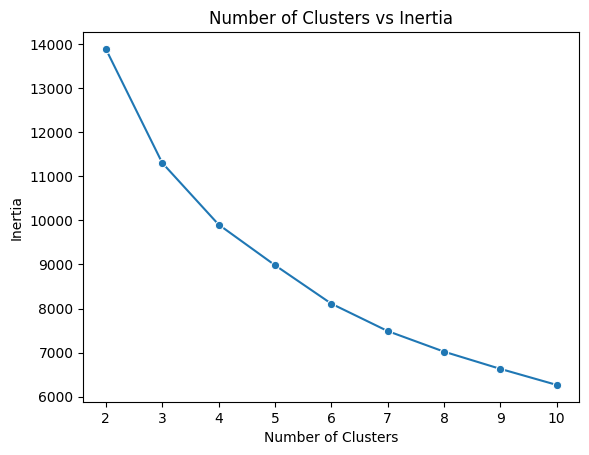

In [18]:
# Line Plot- Relationship num_clusters an inertia
plot= sns.lineplot(x= num_clusters, y= inertia, marker= 'o')
plot.set_xlabel('Number of Clusters')
plot.set_ylabel('Inertia')
plot.set_title('Number of Clusters vs Inertia')

The plot seems to depict an elbow at six clusters, but there isn’t a clear method for confirming that a six-cluster model is optimal. Therefore, the silhouette scores should be checked, which are used to study the distance between clusters. 

In [19]:
# Evaluate silhouette score
def kmeans_sil(num_clusters, x_vals):
    sil_score= []
    for num in num_clusters:
        kms= KMeans(n_clusters= num, random_state= 42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    return sil_score

sil_score= kmeans_sil(num_clusters, X_scaled)
sil_score

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[0.29972682202123296,
 0.25708482855815556,
 0.2682622296502119,
 0.23626959143496562,
 0.2391760760569351,
 0.23378197529205438,
 0.22286764555525798,
 0.22293114859159485,
 0.22273191789235067]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of Clusters vs Silhouette Score')

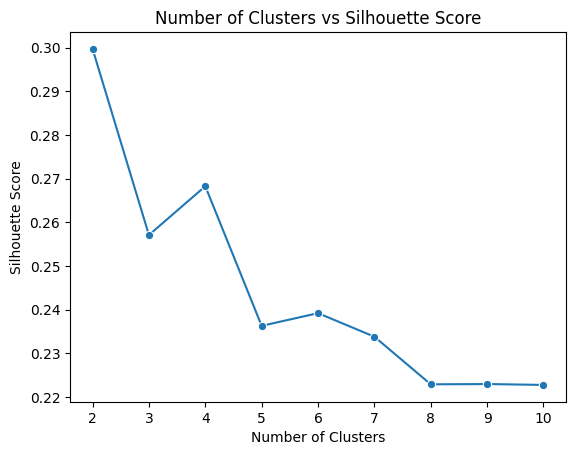

In [20]:
# Line plot- Relationship num_clusters and sil_score
plot= sns.lineplot(x= num_clusters, y= sil_score, marker= 'o')
plot.set_xlabel('Number of Clusters')
plot.set_ylabel('Silhouette Score')
plot.set_title('Number of Clusters vs Silhouette Score')

Silhouette scores near 1 indicate that samples are far away from neighboring clusters. Scores close to 0 indicate that samples are on or very close to the decision boundary between two neighboring clusters.

The plot indicates that the silhouette score is closest to one when the data is partitioned into two clusters, which suggest moderate clustering. 

To decide on an optimal k-value, I will fit a two-cluster model to the dataset. 

In [21]:
# Fit two-cluster model
params = {'n_clusters': 2, 'random_state': 42}
kmeans2 = KMeans(**params)
kmeans2.fit(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [22]:
# Unique labels
print('Unique Labels: ', np.unique(kmeans2.labels_))

Unique Labels:  [0 1]


In [23]:
# New 'cluster' column
penguins['cluster']= kmeans2.labels_
penguins.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,diet,life_stage,health_metrics,year,sex_male,cluster
0,Adelie,53.4,17.8,219.0,5687.0,fish,adult,overweight,2021,False,1
1,Adelie,49.3,18.1,245.0,6811.0,fish,adult,overweight,2021,False,1
2,Adelie,55.7,16.6,226.0,5388.0,fish,adult,overweight,2021,False,1
3,Adelie,38.0,15.6,221.0,6262.0,fish,adult,overweight,2021,False,0
4,Adelie,60.7,17.9,177.0,4811.0,fish,juvenile,overweight,2021,False,0


In [24]:
# Cluster groups by species size
penguins.groupby('cluster')['species'].size()

cluster
0    2284
1    1146
Name: species, dtype: int64

<Axes: title={'center': 'Clusters Differentiated by Species'}, xlabel='(Cluster, Species)', ylabel='Size'>

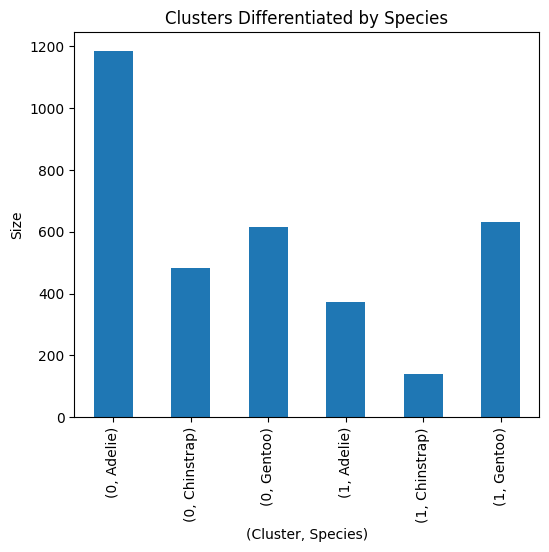

In [25]:
# Clusters differentiated by species
penguins.groupby(by= ['cluster', 'species']).size().plot.bar(title= 'Clusters Differentiated by Species',figsize=(6,5),ylabel='Size',xlabel='(Cluster, Species)')

In [26]:
# Verify if each `cluster` can be differentiated by `species' AND `sex_MALE`.
penguins.groupby(by= ['cluster', 'species' , 'sex_male']).size().sort_values(ascending= False)

cluster  species    sex_male
0        Adelie     False       678
                    True        508
1        Gentoo     True        383
0        Gentoo     False       348
         Chinstrap  False       296
         Gentoo     True        266
1        Adelie     True        262
         Gentoo     False       250
0        Chinstrap  True        188
1        Adelie     False       112
         Chinstrap  True         97
                    False        42
dtype: int64

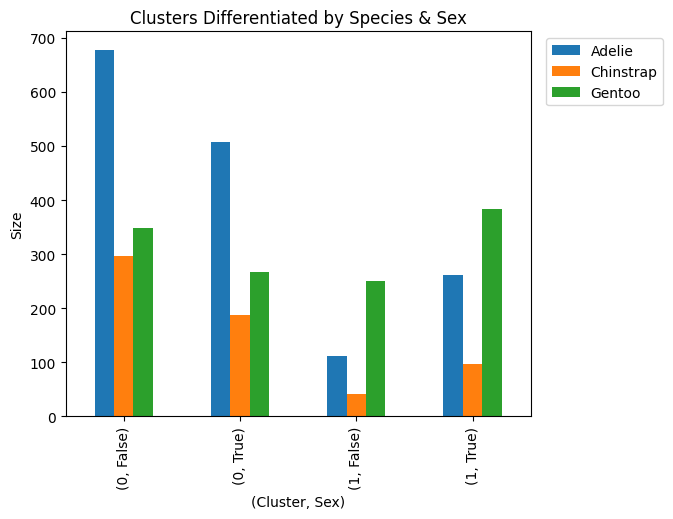

In [27]:
# Clusters differentiated by species and sex
penguins.groupby(by=['cluster','species','sex_male']).size().unstack(level = 'species', fill_value=0).plot.bar(title= 'Clusters Differentiated by Species & Sex', figsize=(6, 5), ylabel= 'Size', xlabel= '(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

**Conclusion**

The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about penguins. The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.